# Uber Price Prediction

The Uber dataset contains details about individual ride records, including information about where and when the ride occurred, the number of passengers, and the fare amount. 

### Features 
****Pickup Date and Time (pickup_datetime)****

* Represents the date and time when the ride began.
* Helps analyze patterns like peak hours, busy days, or seasonal variations in demand.

****Pickup Location (pickup_longitude and pickup_latitude)****

* Specifies the geographical coordinates (longitude and latitude) of the pickup location.
* Useful for calculating the distance between the pickup and dropoff points.

****Dropoff Location (dropoff_longitude and dropoff_latitude)****

* Specifies the geographical coordinates (longitude and latitude) of the dropoff location.
* Also used for calculating the distance traveled.

****Passenger Count (passenger_count)****

* Indicates the number of passengers in the ride.
* Helps understand vehicle usage, such as carpooling or group travel.

****Fare Amount (fare_amount)****

* The total fare charged for the ride (in USD).
* This is the key value we aim to predict in fare estimation models.

### Note:
****Geographical Coordinates:****
* Latitude must be between -90 and 90, and longitude between -180 and 180. Any invalid entries are removed during data cleaning.

#### Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

****Read the data****

In [2]:
data = pd.read_csv('uber.csv')

In [3]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


****Drop unneccesary columns****

In [5]:
uber_data = data.drop(columns = ['Unnamed: 0','key'])

****Drop Null values****

In [6]:
uber_data = uber_data.dropna()

****Convert to Datetime****

In [7]:
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])

In [8]:
#pip install geopy

****Geopy is used to locate the coordinates of addresses, cities, countries, and landmarks across the globe using third-party geocoders and other data sources.****

****Geopy can calculate geodesic distance between two points using the geodesic distance****

In [9]:
from geopy.distance import geodesic

def calculate_distance(lat):
    start = (lat['pickup_latitude'], lat['pickup_longitude'])
    end = (lat['dropoff_latitude'], lat['dropoff_longitude'])
    return geodesic(start, end).km

****Cleaned the dataset by ensuring that the latitude and longitude values  fall within valid geographical ranges.****

* Latitude must be between -90 and 90
* Longitude between -180 and 180

In [13]:
uber_data_cleaned = uber_data[
    (uber_data['pickup_latitude'] >= -90) & (uber_data['pickup_latitude'] <= 90) &
    (uber_data['pickup_longitude'] >= -180) & (uber_data['pickup_longitude'] <= 180) &
    (uber_data['dropoff_latitude'] >= -90) & (uber_data['dropoff_latitude'] <= 90) &
    (uber_data['dropoff_longitude'] >= -180) & (uber_data['dropoff_longitude'] <= 180)
]


In [14]:
 uber_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199987 non-null  float64            
 1   pickup_datetime    199987 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199987 non-null  float64            
 3   pickup_latitude    199987 non-null  float64            
 4   dropoff_longitude  199987 non-null  float64            
 5   dropoff_latitude   199987 non-null  float64            
 6   passenger_count    199987 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 12.2 MB


In [15]:
uber_data_cleaned['distance_km'] = uber_data_cleaned.apply(calculate_distance, axis=1)

****Filtered out days and hours from pickup_datetime column****

In [16]:
uber_data_cleaned['pickup_hour'] = uber_data_cleaned['pickup_datetime'].dt.hour
uber_data_cleaned['day_of_week'] = uber_data_cleaned['pickup_datetime'].dt.dayofweek

In [17]:
uber_data_cleaned = uber_data_cleaned.drop(columns=['pickup_datetime'])

In [18]:
uber_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199987 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   distance_km        199987 non-null  float64
 7   pickup_hour        199987 non-null  int32  
 8   day_of_week        199987 non-null  int32  
dtypes: float64(6), int32(2), int64(1)
memory usage: 13.7 MB


In [19]:
uber_data_cleaned.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hour,day_of_week
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.681111,19,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.454363,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.039603,21,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661442,8,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.483730,17,3


#### Visualization

****Fare amount distribution****

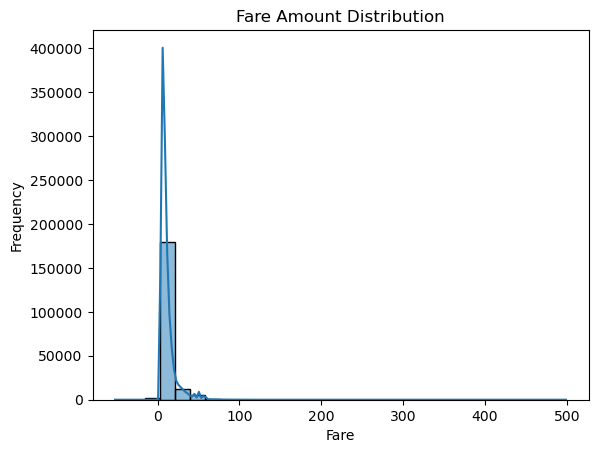

In [20]:
sns.histplot(uber_data_cleaned['fare_amount'],bins = 30, kde = True)
plt.title("Fare Amount Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

****Distance vs Fare****

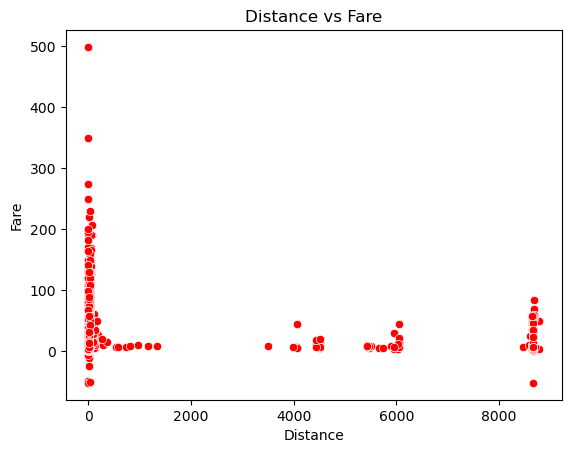

In [21]:
sns.scatterplot(data = uber_data_cleaned, x = 'distance_km', y = 'fare_amount', color = 'red')
plt.title('Distance vs Fare')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

****Heatmap of the correlation matrix****

In [22]:
corr_matrix = uber_data_cleaned.corr()

<Axes: >

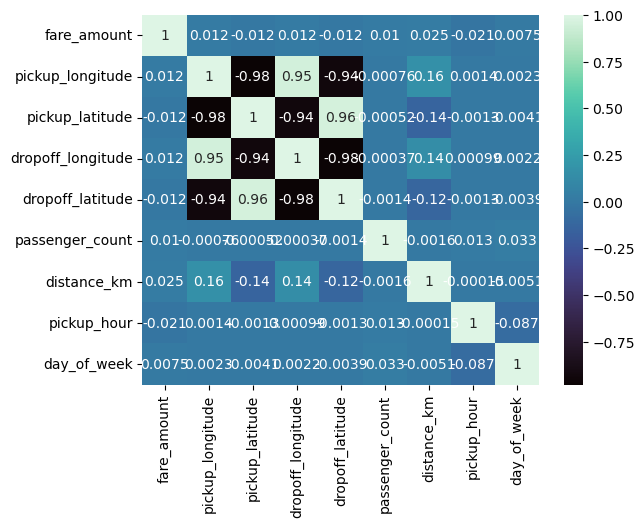

In [23]:
sns.heatmap(corr_matrix,annot = True, cmap = 'mako')

In [24]:
print(uber_data_cleaned.isnull().sum())

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
pickup_hour          0
day_of_week          0
dtype: int64


#### Split the dataset into input and Target variables(X and y)

In [161]:
X = uber_data_cleaned[['passenger_count', 'distance_km', 'pickup_hour', 'day_of_week']]
y = uber_data_cleaned['fare_amount']

In [163]:
print(X.shape)
print(y.shape)

(199987, 4)
(199987,)


#### Split the data into training and testing set

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [167]:
print(X_train.shape)
print(X_test.shape)

(139990, 4)
(59997, 4)


In [169]:
print(y_train.shape)
print(y_test.shape)

(139990,)
(59997,)


#### Training Data with Linear Regression model

In [171]:
from sklearn.linear_model import LinearRegression

In [173]:
lr = LinearRegression()

In [175]:
lr.fit(X_train, y_train)

LinearRegression()

****Score of the Model****

In [177]:
print("Accuracy score of our model is : ",lr.score(X_train,y_train))

Accuracy score of our model is :  0.001097768522267395


****Make Prediction with Test data****

In [179]:
y_pred = lr.predict(X_test)

****Check the mean absolute error, mean square error****

In [181]:
from sklearn import metrics

In [183]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

6.050716286393594

In [185]:
metrics.mean_squared_error(y_test, y_pred,squared = False)


9.953091816873997

In [ ]:
#### Gradient

#### Predicting the price and deploying the model using gradio

In [187]:
import gradio as gr

In [231]:
USD_TO_INR = 82

def predict_fare(passenger_count, distance_km, pickup_hour, day_of_week):
     
    features = pd.DataFrame({
        'passenger_count': [passenger_count],
        'distance_km': [distance_km],
        'pickup_hour': [pickup_hour],
        'day_of_week': [day_of_week]
     })

    predicted_price = lr.predict(features)

    predicted_price_inr = predicted_price[0] * USD_TO_INR
    return f"₹{round(predicted_price_inr, 2)}"



In [233]:
inputs = [

    gr.Number(label="Passenger Count"),
    gr.Number(label="Distance (in km)"),
    gr.Number(label="Pickup Hour (0-23)"),
    gr.Number(label="Day of Week (0=Monday, 6=Sunday)")
]

output = gr.Textbox(label="Predicted price  (in INR)")

In [235]:

app = gr.Interface(
    fn=predict_fare, 
    inputs=inputs, 
    outputs=output,
    title="Uber Price Predictor",
    description="Enter the  details to predict the  price."
)

In [237]:
app.launch()

* Running on local URL:  http://127.0.0.1:7867

To create a public link, set `share=True` in `launch()`.
